# Classification with Linear Models (aka. Logistic Regression)

As discussed in class, the linear regression works by identifying a linear function of the input features. In the case of classification, we are using linear regression to predict the probability $p$ that an instance belongs to designated "positive" class. We can then formulate our regression as predicting the "log odds" of class participation:
$$\hat{y}=\log_e\frac{\hat{p}}{1-\hat{p}}=\sum_{j=0}^{p}\hat{\beta}_{j}X_{j}$$
and then our final probability of being in the positive class is determined by transforming $\hat{y}$ via the logistic function:
$$\hat{p}=\frac{1}{1+e^{-\hat{y}}}$$

To work with linear regression in Python, we can make use of the existing [numpy](https://numpy.org/) and [scikit-learn](https://scikit-learn.org/) libraries. Let's start by importing them (and a [matplotlib](https://matplotlib.org/) for some plotting of the results):

In [1]:
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

## Our Training Data (note: same process as for Lecture 5)

We'll also need some data to act as the historical observations from our problem. For this example, we'll just make some up (but usually, you'd be given this data). In this case, we (the people doing the work) actually know the underlying function $f(X)$, but from the modelling perspective this function is not known:

In [2]:
## This is the true underlying "generating" function of our problem, in this case
## we are using it to separate our data into two classes "a" and "b" depending
## upon where in a 2-D space an instance sits.
##
## AS WITH REGRESSION, LET'S PRETEND THAT WE DON'T KNOW THIS ONE :)
def f(X):
    t = 0.444*(X[:, 0] + 0.5)**2 + 0.5*np.sin(np.pi * X[:, 0])
    return np.where(X[:, 1] > t, 1, 0)
class_labels = np.array([ 'a', 'b' ])

Now, we will use this function to generate some training data (it is still called training data, even though no real training takes place in k-Nearest Neighbours):

In [3]:
rng = np.random.default_rng(1234) ## notice the fixed seed for reproducability

n_points = 50
X_train = rng.uniform(-1, 1, size=(n_points, 2))
y_train = f(X_train)
X_train += rng.normal(0, 0.05, size=X_train.shape) ## let's just add a little noise to our data to make it interesting

## we'll also generate some "test" data use this to test the shape of our learned function shortly
n_test = 50
xx1, xx2 = np.meshgrid(np.linspace(-1.1, 1.1, n_test), np.linspace(-1.1, 1.1, n_test))
X = np.c_[xx1.ravel(), xx2.ravel()]
y = f(X)
Z = y.reshape(xx1.shape)

Let's take a look at the data (and underlying generating function) before moving on to modelling:

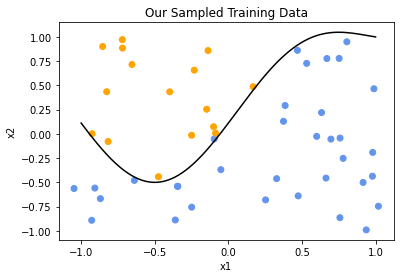

In [4]:
a = np.linspace(-1, 1, 500)
t = 0.444*(a + 0.5)**2 + 0.5*np.sin(np.pi * a)
plt.scatter(X_train[:, 0], X_train[:, 1], color=np.where(y_train==1, 'orange', 'cornflowerblue'))
plt.plot(a, t, color='black', label='True Underlying Class Separator - f(X)')
plt.title('Our Sampled Training Data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Note that the black line ($f(X)$) serves as the point of separation between two classes (although we've added a little noise to our instances, so there's a couple that manage to sneak over to opposite sides of this boundary). Remember, the function that this line represents is not known to k-Nearest Neighbours - its job is to estimate this function from available training data.

## Applying Logistic Regression

Now that we have a training set of data, we can move onto modelling. We do this by instantiating a LogisticRegression model, calling the fit function, and then making predictions from the resulting model with the predict function. The basic logistic regression is free from hyperparamters, so there is only one model to build:

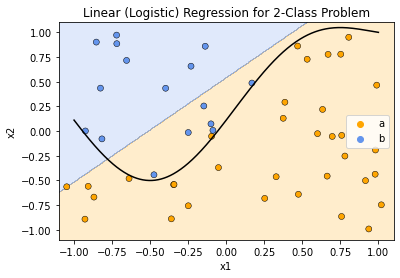

In [5]:
mdl = LogisticRegression(random_state=0)
mdl.fit(X_train, y_train)

## Now, let's visualise the decision boundaries:
xx, yy = np.meshgrid(np.linspace(-1.1, 1.1, 500), np.linspace(-1.1, 1.1, 500))
Z = mdl.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=ListedColormap(['orange', 'cornflowerblue']), alpha=0.2)
# Plot the true class boundary
plt.plot(a, t, color='black')
# Plot also the training points
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], 
                hue=class_labels[y_train], hue_order=class_labels,
                palette=['orange', 'cornflowerblue'], edgecolor="black")
plt.title('Linear (Logistic) Regression for 2-Class Problem')
plt.xlabel('x1')
plt.ylabel('x2')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)

plt.show()

In the resulting plot, each shaded region marks indicates the class that would be assigned by our linear model to observations in that region. Note that the decision boundary (where the class changes) is a straight line - this is a property of linear models (all decision boundaries will be straight lines).

For now, that's pretty much all of the basics of linear regression covered! One thing that you should try is to modify the training set size for this problem (say from 50 to 500) and observe the difference in behaviour (particularly relative the kNN example from the last lecture) - does the increase in training set size greatly influence the resulting decision boundary?

## Logistic Regression for Multiple Classes

As mentioned in the lectures, we can extend the concept two-class logistic regression to multiple classes. The interface in scikit-learn for mutli-class logistic regression is exactly that same as for the two-class approach (i.e., through the LogisticRegression component). Here's a quick example using the famous [Iris](https://en.wikipedia.org/wiki/Iris_flower_data_set) data set (presented as a complete script, as it is very similar to what you have seen for the two-class problems):

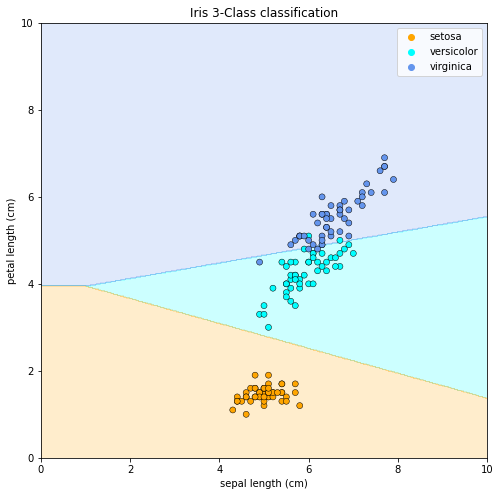

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

##rng = np.random.default_rng(1234) ## notice the fixed seed for reproducability

iris = load_iris()
X = iris.data[:, [0,2]]
y = iris.target
feature_names = [ iris.feature_names[0], iris.feature_names[2] ]

mdl = LogisticRegression(random_state=0)
mdl.fit(X, y)

# Put the result into a color plot
xx, yy = np.meshgrid(np.linspace(0, 10, 500), np.linspace(0, 10, 500))
Z = mdl.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(8, 8))
plt.contourf(xx, yy, Z, cmap=ListedColormap(['orange', 'cyan', 'cornflowerblue']), alpha=0.2)

# Plot also the training points
sns.scatterplot(x=X[:, 0], y=X[:, 1], 
                hue=iris.target_names[y], hue_order=iris.target_names,
                palette=['orange', 'cyan', 'cornflowerblue'], edgecolor="black")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title('Iris 3-Class classification')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.show()